# 선형 회귀 개념 ~ 알고리즘
- 선형 회귀(Linear Regression)은 머신러닝의 기본적인 기법 중 하나입니다.
    - 따라서, 선형 회귀를 토대로 설명하도록 하겠습니다.(분류와 회귀는 출력 데이터의 형태에 차이만있을뿐 다른 차이는 없습니다.)
- 아래의 그림으로 예를 들도록 하겠습니다.
    - 아래의 그림은 **키라는 입력데이터**로 **몸무게라는 출력을 예측** 한다 가정

![Screenshot from 2025-03-04 20-46-45.png](<attachment:Screenshot from 2025-03-04 20-46-45.png>)
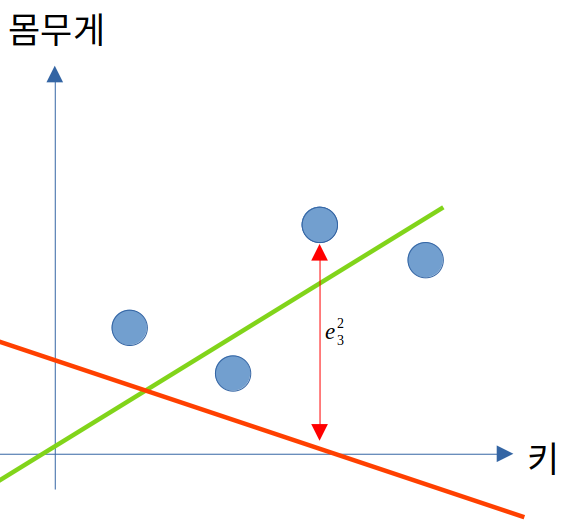

- 예상대로 키가 클수록 몸무게가 높은 경향을 보이고 있습니다.
- 또한 선형 회귀의 목표가 관계를 가장 잘 나타내는 선을 찾는것이므로, 초록색선이 이상적인 선이며, 이선의 기울기a와 y절편 b가 찾아내야하는 최적의 파라미터 입니다.
    - 학습 초기에는 a,b를 무작위로 잡습니다
- 위 그림에서는 빨간색 직선이 임의로 설정된 초기 파라미터로 그린 그래프이며, 직관적으로 보더라도 초록색 직선이 더 나은 직선입니다.
- 이때, 얼마만큼 더 나은지 정확히 수치화하려면 파라미터의 좋고 나끔을 정략적으로 평가할 수 있는 방법이 필요합니다.

## Loss
- 이를 위해 도입되는 함수가 LOSS 함수(손실함수)입니다.
    - **해당 파라미터가 얼마나 안좋은지를 나타내는 함수**, 이를 최소화 하는 파라미터가 곧 최적의 파라미터입니다.
- 학습 과정을 **이 입력에는 이 출력이 나와야 해!** 라고 한다면, Loss로 표현하면 **Loss를 최대한 줄여야 해!** 따라서, '이 입력'에는 '이 출력'이 가깝게 나올수록 Loss가 작아지게 설계해야합니다.

- Loss함수는 딥러닝 학습의 핵심 소요, 해결하려는 문제의 특성에 맞게 적절하게 정의해야합니다.
- 여기서는 AI의 예측 몸무게 Yp, 실제 몸무게 Y의 차로 Loss를 정의해야합니다.
- 따라서 위 그림에 나타나 있는 e는 아래의 식으로 표현이 가능하며, $$e_{3}^{2} = Y_{5} - Yp_{5}$$
- 이 에러를 평균낸것이 Loss로 정의할수 있습니다.
$$L = \frac{e_{1}+e_{2}+e_{3}+e_{4}}{4}$$

- 하지만, 위 Loss 함수는 아래의 그림과 같이 빨간색과 파란색회귀선의 Loss가 0이라는 문제점이 있습니다.
    - 빨간색 loss = 1000-1000 = 0, 초록색 loss = 0 + 0 = 0   
       ![Screenshot from 2025-03-04 21-12-35.png](<attachment:Screenshot from 2025-03-04 21-12-35.png>)
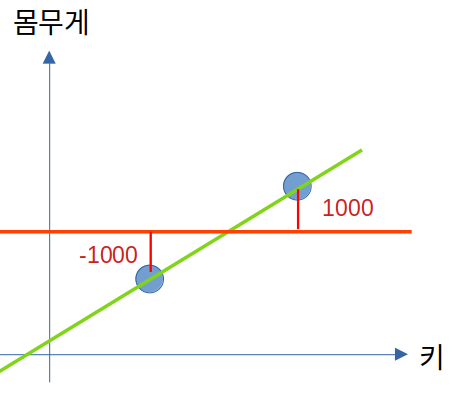

### MAE vs MSE
- 이를 해결하기 위해 절댓값을 사용하는 MAE와 제곱을 사용하는 MSE가 나왔습니다.
- 두 방법중 MSE가 더 많이 쓰입니다. 왜?
- 아래의 그림을 예시로 들도록 하겠습니다.

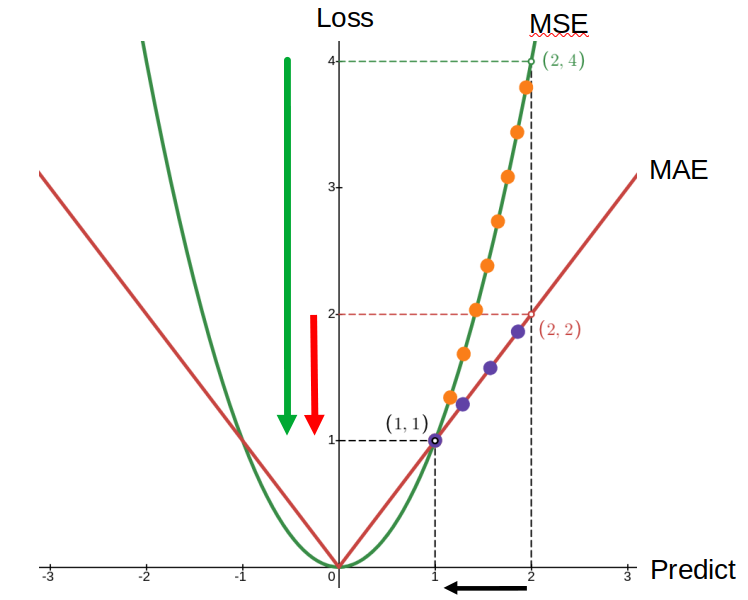

- 먼저, 입력에 대한 **예측값이 2가 나왔다고 가정**하고, 각각의 **MSE와 MAE의 loss 함수값 4, 2라 가정**하겠습니다.
- 이때, 경사하강법을 이용하여 파라미터를 수정할때, **MSE는 loss를 4로 MAE는 2로 정의되기 때문에, MSE가 더 큰폭으로 감소**합니다.
    - 이는 **데이터의 Loss값에 민감**하다고 할 수 있으며, 이상치 데이터가 있을 경우, 이상치 데이터 쪽으로 회귀선이 기울어 정확도가 많이 떨어질수 있습니다.

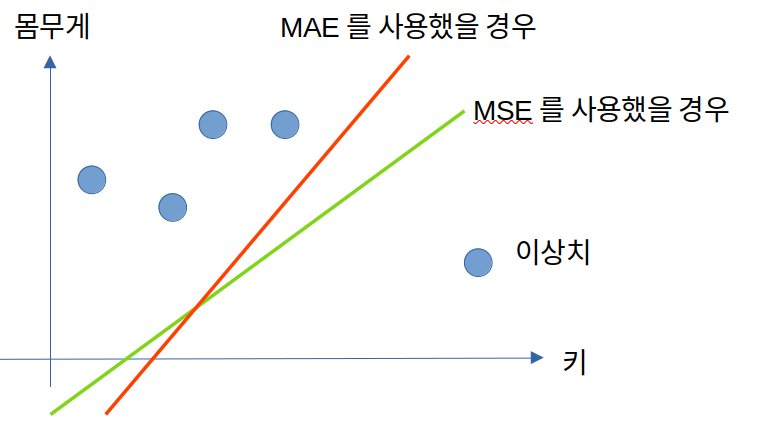

- 그렇다면, MSE가 더 안좋은거 같은데, 왜 MSE를 더 많이 사용하는가?
    - 이 답 또한, 민감도의 차이입니다.
- 앞서, MSE가 loss값에 민감하여 이상치 데이터가 들어왔을때, 이상치 데이터쪽으로 많이 쏠려 정확도가 떨어질것이라고 언급하였습니다.
    - 그렇다면 **이를 다르게 말하면 올바른 데이터만 있다면, MAE보다 MSE가 정답에 더 근접하게 다가갈 수 있다.** 입니다.
        - Loss에 민감하니까 더 큰 폭으로 Loss를 줄여나갈 것이고, 이는 정답데이터에 더 근접할 수 있다.
    - 따라서, 이상치 데이터는 학습할때 사람이 없애고 학습을 시키는 것이 훨씬 정확도에 이득이라는 것을 알 수 있습니다.

- 물론, 미분이 되지 않는다는 것은 중요한 일입니다. 그렇기 때문에 step function이 활성화 함수로 쓰이지 못하는것입니다.
- 하지만, MAE는 다릅니다. 미분이 0에서만 불가능합니다. 따라서 Loss값이 정확하게 0.00000000000001의 오차도 없이 0을 찍어야만, 미분이 불가능하다는 것입니다.
    - 0에 수렴한다는 것은 0에 수없이 가까워진다는 것일뿐 절대 0이 될수가 없습니다.
    - 하지만, 0이 꼭 안나온다 라는 것 아닙니다. 그만큼 나오기가 어렵다는 것이며, 얼마나 나오기 어려운지를 생각하신다면, MAE와 마찬가지로 미분이 불가능한 활성화 함수(ReLU 등)이 많이 사용된다고만 생각하셔도 될것같습니다.

#### 그럼 MAE의 사용처는?
- MAE는 보통 이상치가 많은 데이터를 학습으로 사용할때 사용합니다..
- 예를들어, Denoising Auto-Encoder라는 알고리즘이 있습니다.
- 이 알고리즘은 데이터의 노이즈가 있다고 가정하고 그 노이즈를 제거하는 알고리즘입니다.
    - 학습 방법 : input = 원본 데이터 + 노이즈 -> MAE사용 -> 출력 : 노이즈가 제거된 원본데이터 -> 역전파

- 이와 같이 노이즈를 집적적으로 활용되는 알고리즘에 많이 사용됩니다.